<a href="https://colab.research.google.com/github/evroth/gsb545repo/blob/main/Lab1_gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

## Working with Data of Global Indicators – Gapminder

# Task 1

1. The x-axis is Income, the y-axis is life expectancy. Each point or circle is a country where the area is representative of its population. The aesthetics added onto that are a fill color for region of the world that each country is in. The map updates for each year’s data and can be played through to visualize change over the years.

3. Graphs recreated multiple ways below.

Below is not really it but similar.

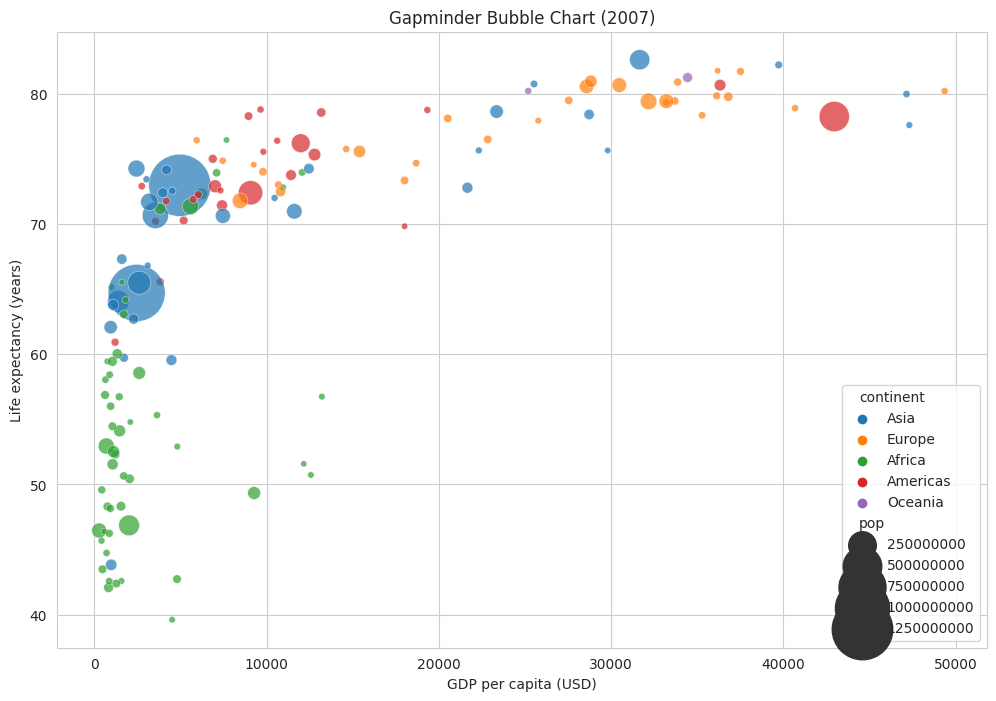

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")

# Filter the data to only include 2007
data = data[data["year"] == 2007]

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x="gdpPercap", y="lifeExp", hue="continent", size="pop", data=data, sizes=(20, 2000), alpha=0.7)

# Add labels and a title
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life expectancy (years)")
plt.title("Gapminder Bubble Chart (2007)")

# Show the plot
plt.show()


In [ ]:
data

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


Data for task 1:

In [9]:
import pandas as pd
import numpy as np

# Load the CSV files
df1 = pd.read_csv("income.csv")
# Pivot the DataFrame longer
df1 = df1.melt(id_vars=['country'], var_name='year', value_name='income')
df1['income'] = df1['income'].astype(str).str.replace('.', '')
df1['income'] = df1['income'].str.replace('k', '000')
df1['income'] = pd.to_numeric(df1['income'])

df2 = pd.read_csv("life_expectancy_years.csv")
df2 = df2.melt(id_vars=['country'], var_name='year', value_name='life_expectancy')

df3 = pd.read_csv("population_total.csv")
df3 = df3.melt(id_vars=['country'], var_name='year', value_name='population')

# define a function to convert string values to numeric
def clean_population(population):
    if 'k' in population:
        return float(population.replace('k', '')) * 1000
    elif 'M' in population:
        return float(population.replace('M', '')) * 1000000
    elif 'B' in population:
        return float(population.replace('B', '')) * 1000000000
    else:
        return float(population)

df3['population'] = df3['population'].apply(clean_population)


df4 = pd.read_csv("q1data.csv")
df4 = df4.loc[:, ["country", "four_regions"]]


# Merge the DataFrames by "country" and "year"
merged_df = pd.merge(df1, df2, on=["country", "year"])
merged_df = pd.merge(merged_df, df3, on=["country", "year"])
data = pd.merge(merged_df, df4, on=["country"])
data['year'] = pd.to_numeric(data['year'])
data = data.drop(data[data['country'].isin(['Andorra', 'Tuvalu'])].index)

# Print the merged DataFrame
print(data)


<ipython-input-9-18fb37059333>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['income'] = df1['income'].astype(str).str.replace('.', '')


           country  year  income  life_expectancy  population four_regions
0      Afghanistan  1799     683             28.2   3280000.0         asia
1      Afghanistan  1800     683             28.2   3280000.0         asia
2      Afghanistan  1801     683             28.2   3280000.0         asia
3      Afghanistan  1802     683             28.2   3280000.0         asia
4      Afghanistan  1803     683             28.2   3280000.0         asia
...            ...   ...     ...              ...         ...          ...
48940     Zimbabwe  2045    5440             66.9  22800000.0       africa
48941     Zimbabwe  2046    5560             67.1  23100000.0       africa
48942     Zimbabwe  2047    5670             67.3  23400000.0       africa
48943     Zimbabwe  2048    5800             67.4  23700000.0       africa
48944     Zimbabwe  2049    5920             67.6  23900000.0       africa

[48443 rows x 6 columns]


In [10]:
df1

,country,year,income
0,Afghanistan,1799,683
1,Angola,1799,700
2,Albania,1799,755
3,Andorra,1799,1360
4,United Arab Emirates,1799,1130
...,...,...,...
48940,Samoa,2049,107000
48941,Yemen,2049,4540
48942,South Africa,2049,197000
48943,Zambia,2049,5680


In [11]:
mask = data.isna()

# select the rows that contain at least one NaN value
rows_with_nans = data[mask.any(axis=1)]

print(rows_with_nans)

        country  year  income  life_expectancy  population four_regions
11546  Dominica  1799     751              NaN     19900.0     americas
11547  Dominica  1800     751              NaN     19900.0     americas
11548  Dominica  1801     751              NaN     19900.0     americas
11549  Dominica  1802     751              NaN     19900.0     americas
11550  Dominica  1803     751              NaN     19900.0     americas
...         ...   ...     ...              ...         ...          ...
41661  Eswatini  2045  132000             64.8   1630000.0          NaN
41662  Eswatini  2046  135000             65.0   1650000.0          NaN
41663  Eswatini  2047  138000             65.1   1670000.0          NaN
41664  Eswatini  2048  141000             65.3   1690000.0          NaN
41665  Eswatini  2049  144000             65.5   1700000.0          NaN

[1769 rows x 6 columns]


In [12]:
data.dtypes

country             object
year                 int64
income               int64
life_expectancy    float64
population         float64
four_regions        object
dtype: object

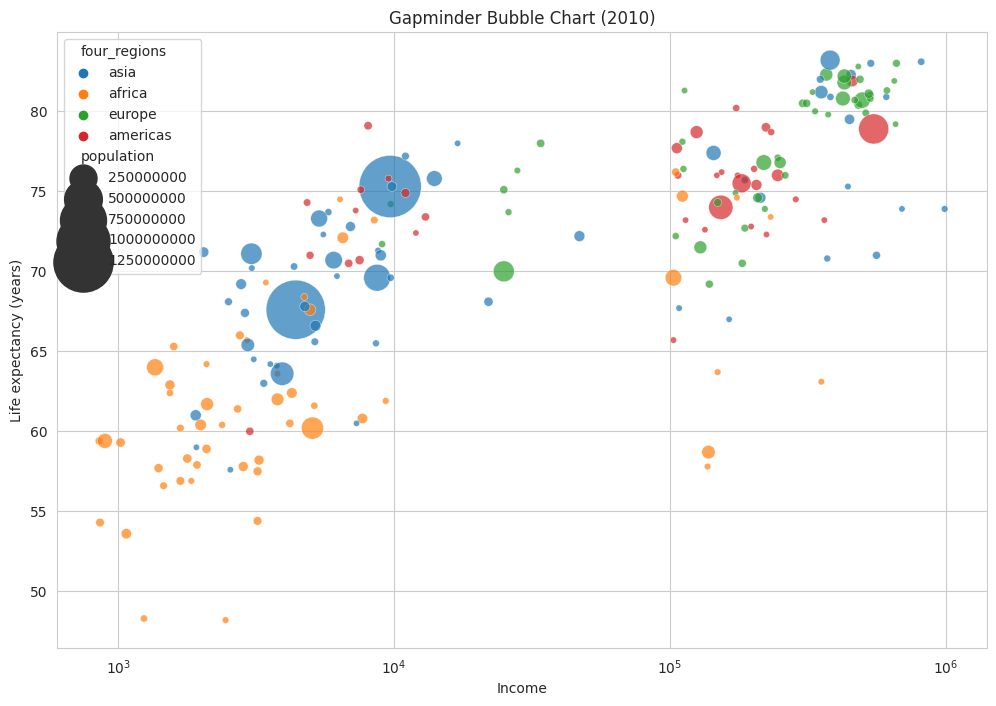

In [15]:
# Filter the data to only include 2011
data2010 = data[data["year"] == 2010]

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x="income", y="life_expectancy", hue="four_regions", size="population", data=data2010, sizes=(20, 2000), alpha=0.7)

# Add labels and a title
plt.xlabel("Income")
plt.ylabel("Life expectancy (years)")
plt.title("Gapminder Bubble Chart (2010)")
plt.xscale("log", base=10)

# Show the plot
plt.show()

In [13]:
data2010

,country,year,income,life_expectancy,population,four_regions
211,Afghanistan,2010,1910,61.0,3010000,asia
462,Angola,2010,7680,60.8,2420000,africa
713,Albania,2010,111000,78.1,2930000,europe
1215,United Arab Emirates,2010,561000,71.0,8950000,asia
1466,Argentina,2010,246000,76.0,4130000,americas
...,...,...,...,...,...,...
47901,Samoa,2010,6210,69.7,187000,asia
48152,Yemen,2010,4750,67.8,2380000,asia
48403,South Africa,2010,138000,58.7,520000,africa
48654,Zambia,2010,3200,57.5,140000,africa


The above graph is with the data straight from Gapminder

# Task 2

I formatted this question a little neater

1. The x-axis is exports as a percent of GDP, y-axis is imports as a percentage of GDP. Each dot represents a country. The color or fill of the points represents the geographical region. The size of the dots is represented by the energy use per person in that individual country.

2. The data

In [51]:
# Load the CSV files
energy = pd.read_csv("energy.csv")
exports = pd.read_csv("exports.csv")
imports = pd.read_csv("imports.csv")

In [52]:
# Get regions
regions = pd.read_csv("q1data.csv")
regions = regions.loc[:, ["country", "four_regions"]]

In [53]:
print(regions)

         country four_regions
0    Afghanistan         asia
1        Albania       europe
2        Algeria       africa
3        Andorra       europe
4         Angola       africa
..           ...          ...
192    Venezuela     americas
193      Vietnam         asia
194        Yemen         asia
195       Zambia       africa
196     Zimbabwe       africa

[197 rows x 2 columns]


In [54]:
# Manipulate and clean these guys
energy = energy.melt(id_vars=['country'], var_name='year', value_name='energy')
exports = exports.melt(id_vars=['country'], var_name='year', value_name='exports')
imports = imports.melt(id_vars=['country'], var_name='year', value_name='imports')

In [55]:
print(exports)

                    country  year  exports
0                     Aruba  1959      NaN
1               Afghanistan  1959     4.13
2                    Angola  1959      NaN
3                   Albania  1959      NaN
4      United Arab Emirates  1959      NaN
...                     ...   ...      ...
12012                 Samoa  2019    31.60
12013                 Yemen  2019      NaN
12014          South Africa  2019    27.80
12015                Zambia  2019    46.80
12016              Zimbabwe  2019    37.20

[12017 rows x 3 columns]


In [62]:
# Merge
task2 = pd.merge(energy, exports, on=["country", "year"])
task2 = pd.merge(task2, imports, on=["country", "year"])
task2 = pd.merge(task2, regions, on=["country"])
task2['year'] = pd.to_numeric(task2['year'])
#task2 = task2.drop(task2[task2['country'].isin(['Andorra', 'Tuvalu'])].index)
# could always drop out the ones like on the website
# Print the merged DataFrame
print(task2)

       country  year energy  exports  imports four_regions
0       Angola  1959    NaN      NaN      NaN       africa
1       Angola  1960    NaN      NaN      NaN       africa
2       Angola  1961    NaN      NaN      NaN       africa
3       Angola  1962    NaN      NaN      NaN       africa
4       Angola  1963    NaN      NaN      NaN       africa
...        ...   ...    ...      ...      ...          ...
9067  Zimbabwe  2010    795     34.8     54.7       africa
9068  Zimbabwe  2011    824     25.2     49.0       africa
9069  Zimbabwe  2012    845     22.0     36.7       africa
9070  Zimbabwe  2013    NaN     20.9     33.7       africa
9071  Zimbabwe  2014    NaN     19.2     37.6       africa

[9072 rows x 6 columns]


In [61]:
def clean_column(data, column_name):
    # Replace the letters 'k', 'M', and 'B' with their respective multipliers
    column = data[column_name].str.replace('k', 'e3')
    column = column.str.replace('M', 'e6')
    column = column.str.replace('B', 'e9')
    
    # Convert the values to numeric format
    column = pd.to_numeric(column, errors='coerce')
    
    return column


In [63]:
task2['energy'] = clean_column(task2, "energy")

In [65]:
print(task2)

       country  year  energy  exports  imports four_regions
0       Angola  1959     NaN      NaN      NaN       africa
1       Angola  1960     NaN      NaN      NaN       africa
2       Angola  1961     NaN      NaN      NaN       africa
3       Angola  1962     NaN      NaN      NaN       africa
4       Angola  1963     NaN      NaN      NaN       africa
...        ...   ...     ...      ...      ...          ...
9067  Zimbabwe  2010   795.0     34.8     54.7       africa
9068  Zimbabwe  2011   824.0     25.2     49.0       africa
9069  Zimbabwe  2012   845.0     22.0     36.7       africa
9070  Zimbabwe  2013     NaN     20.9     33.7       africa
9071  Zimbabwe  2014     NaN     19.2     37.6       africa

[9072 rows x 6 columns]


In [66]:
task2.dtypes

country          object
year              int64
energy          float64
exports         float64
imports         float64
four_regions     object
dtype: object

In [67]:
task2 = task2[task2["year"] == 1997]

3. Making the graph

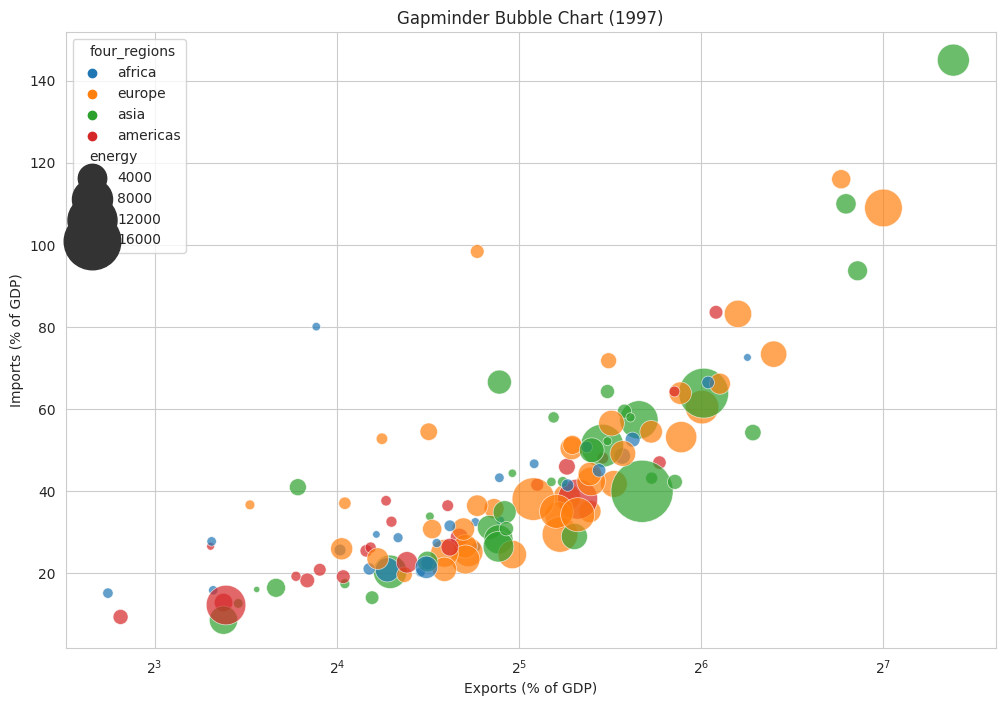

In [68]:
# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x="exports", y="imports", hue="four_regions", size="energy", data=task2, sizes=(20, 2000), alpha=0.7)

# Add labels and a title
plt.xlabel("Exports (% of GDP)")
plt.ylabel("Imports (% of GDP)")
plt.title("Gapminder Bubble Chart (1997)")
plt.xscale("log", base=2)

# Show the plot
plt.show()

# Task 3

1. The x-axis is percent of individuals in a country using the internet, y-axis is GDP per capita. Each dot represents a country. The color or fill of the points represents the geographical region. The size of the dots is represented by the average income per person in that individual country.

2. The data

In [99]:
# Load the CSV files
internet = pd.read_csv("internet.csv")
gdp = pd.read_csv("gdp.csv")
income = pd.read_csv("income.csv")

In [100]:
# Manipulate and clean these guys
internet = internet.melt(id_vars=['country'], var_name='year', value_name='internet')
gdp = gdp.melt(id_vars=['country'], var_name='year', value_name='gdp')
income = income.melt(id_vars=['country'], var_name='year', value_name='income')

In [101]:
print(income)

                    country  year income
0               Afghanistan  1799    683
1                    Angola  1799    700
2                   Albania  1799    755
3                   Andorra  1799   1360
4      United Arab Emirates  1799   1130
...                     ...   ...    ...
48940                 Samoa  2049  10.7k
48941                 Yemen  2049   4540
48942          South Africa  2049  19.7k
48943                Zambia  2049   5680
48944              Zimbabwe  2049   5920

[48945 rows x 3 columns]


In [103]:
# Merge
task3 = pd.merge(internet, gdp, on=["country", "year"])
task3 = pd.merge(task3, income, on=["country", "year"])
task3 = pd.merge(task3, regions, on=["country"])
task3['year'] = pd.to_numeric(task3['year'])

# Print the merged DataFrame
print(task3)

           country  year internet   gdp income four_regions
0      Afghanistan  1959      NaN   NaN   1540         asia
1      Afghanistan  1960      NaN   NaN   1520         asia
2      Afghanistan  1961      NaN   NaN   1510         asia
3      Afghanistan  1962      NaN   NaN   1510         asia
4      Afghanistan  1963      NaN   NaN   1500         asia
...            ...   ...      ...   ...    ...          ...
11707     Zimbabwe  2015     23.1  1430   3680       africa
11708     Zimbabwe  2016     24.4  1480   3800       africa
11709     Zimbabwe  2017     25.0  1530   3920       africa
11710     Zimbabwe  2018     25.1  1410   3630       africa
11711     Zimbabwe  2019     29.3  1310   3370       africa

[11712 rows x 6 columns]


In [104]:
task3 = task3[task3["year"] == 2001]

In [105]:
# Clean Columns
task3['internet'] = pd.to_numeric(task3['internet'])
task3['gdp'] = clean_column(task3, "gdp")
task3['income'] = clean_column(task3, "income")

In [106]:
task3.dtypes

country          object
year              int64
internet        float64
gdp             float64
income          float64
four_regions     object
dtype: object

In [107]:
print(task3)

                    country  year  internet      gdp   income four_regions
42              Afghanistan  2001   0.00456    320.0   1190.0         asia
103                  Angola  2001   0.27000   2720.0   2930.0       africa
164                 Albania  2001   0.39000   2250.0   6750.0       europe
225                 Andorra  2001  11.30000  36200.0  36100.0       europe
286    United Arab Emirates  2001  28.30000  56800.0  73500.0         asia
...                     ...   ...       ...      ...      ...          ...
11449                 Samoa  2001   2.24000   3610.0   5310.0         asia
11510                 Yemen  2001   0.51900   2430.0   4990.0         asia
11571          South Africa  2001   6.71000   5120.0  11400.0       africa
11632                Zambia  2001   0.47800    808.0   2080.0       africa
11693              Zimbabwe  2001   1.10000   1560.0   4000.0       africa

[192 rows x 6 columns]


3. Making the graph

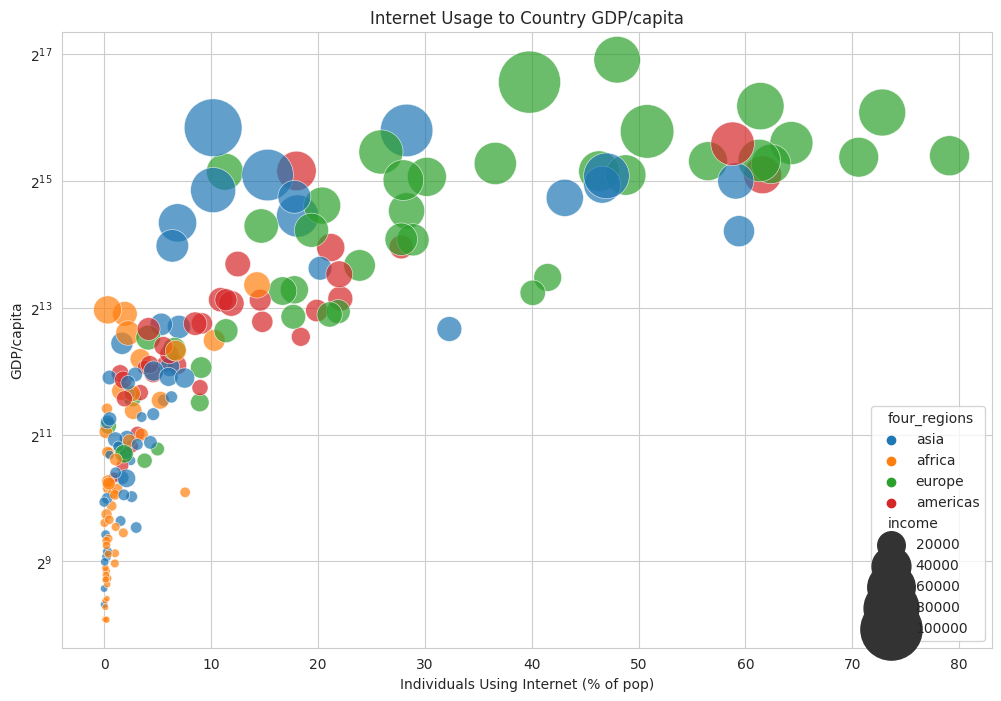

In [119]:
# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x="internet", y="gdp", hue="four_regions", size="income", data=task3, sizes=(20, 2000), alpha=0.7)

# Add labels and a title
plt.xlabel("Individuals Using Internet (% of pop)")
plt.ylabel("GDP/capita")
plt.title("Internet Usage to Country GDP/capita")
plt.xscale("linear")
plt.yscale("log", base=2)

# Show the plot
plt.show()